<img width=350 src="https://agentz.ai/wp-content/uploads/2019/11/Agentz-Logo-01-1024x371.png">
<div style="text-align: center; font-size: 18px;"> <h1>Programming assignment for ML developer</h1> </div>


## Background
Let's say we have to develop an AI model that can predict flight delays during the
flight duration based on data about previous delay/turbulence encountered.

## Problem statement
1. What will be the format of data you need to collect?
2. How will you use that to create a model?
3. What training type and algorithm will you select?
4. What are the metrics you will calculate to understand your model's effectiveness?

In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import emoji
pd.set_option('display.max_columns', None)

In [142]:
data = pd.read_csv('data/feb-20-flight-delay.csv')

### 1. Data Format
Instead of picking up dataset directly from Kaggle, I preferred to get the data from the website of [US Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236) for the month of February 2020.
After carefully analyzing each data points, I decided to manually pick 9 variable to predict if there will be a delay in the flight.
- __MONTH__ - Month
- __DAY_OF_MONTH__ - Day of Month
- __DAY_OF_WEEK__ - Day of Week
- __OP_UNIQUE_CARRIER__ - Unique Carrier Code
- __ORIGIN__ - Origin airport location
- __DEST__ - Destination airport location
- __DEP_TIME__ - Actual Departure Time (local time: hhmm)
- __DEP_DEL15__ - Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No) [TARGET VARIABLE]
- __DISTANCE__ - Distance between airports (miles)

In [143]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DISTANCE,Unnamed: 9
0,2,1,6,MQ,CLT,LYH,1430.0,0.0,175.0,NaN
1,2,8,6,MQ,CLT,LYH,1442.0,0.0,175.0,NaN
2,2,13,4,MQ,DFW,SHV,2247.0,0.0,190.0,NaN
3,2,14,5,MQ,DFW,SHV,2230.0,0.0,190.0,NaN
4,2,15,6,MQ,DFW,SHV,2246.0,0.0,190.0,NaN


## Data Preprocessing

We might have an extra column in our dataset, let's get rid of it first

In [144]:
data = data.drop(['Unnamed: 9'], axis=1)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569317 entries, 0 to 574267
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              569317 non-null  int64  
 1   DAY_OF_MONTH       569317 non-null  int64  
 2   DAY_OF_WEEK        569317 non-null  int64  
 3   OP_UNIQUE_CARRIER  569317 non-null  object 
 4   ORIGIN             569317 non-null  object 
 5   DEST               569317 non-null  object 
 6   DEP_TIME           569317 non-null  float64
 7   DEP_DEL15          569317 non-null  float64
 8   DISTANCE           569317 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 43.4+ MB


We see that our target variable __DEP_DEL15__ has the datatype of _float64_.

Let's convert it into _int_.

In [150]:
data['DEP_DEL15'] = data['DEP_DEL15'].astype(int)

Let's quickly remove the NULL values if present any

In [145]:
data.isna().sum()

MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
OP_UNIQUE_CARRIER       0
ORIGIN                  0
DEST                    0
DEP_TIME             4938
DEP_DEL15            4951
DISTANCE                0
dtype: int64

There are around __~0.8%__ NULL values present in __DEP_TIME__ and __DEP_DEL15__

In [146]:
data = data.dropna(axis=0)

Now let's have a look at the number of columns and rows in our dataset.

In [148]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in our dataset.")

There are 569317 rows and 9 columns in our dataset.


## Exploratory Data Analysis
Let's uncover some meaningful and hidden insights out of our dataset.

In [152]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DISTANCE
count,569317.0,569317.000000,569317.000000,569317.000000,569317.000000,569317.000000
mean,2.0,15.220592,3.987373,1332.606850,0.144352,797.815990
std,0.0,8.298937,1.991039,498.664754,0.351447,583.771451
min,2.0,1.000000,1.000000,1.000000,0.000000,31.000000
25%,2.0,8.000000,2.000000,918.000000,0.000000,369.000000
50%,2.0,15.000000,4.000000,1328.000000,0.000000,642.000000
75%,2.0,22.000000,6.000000,1741.000000,0.000000,1041.000000
max,2.0,29.000000,7.000000,2400.000000,1.000000,5095.000000


Apart from the statistics given in the table above, we can also that there are 6 numerical and 3 categorical variables in our dataset.

Let's quickly visualize the distribution of __DISTANCE__ variable

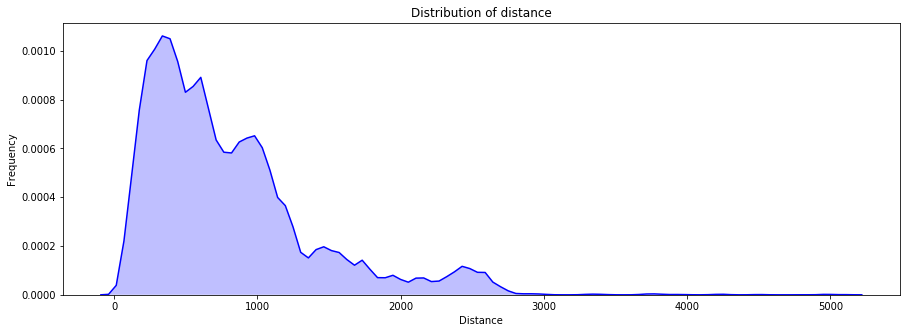

In [153]:
plt.figure(figsize=(15,5))
sns.distplot(data['DISTANCE'], hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of distance")
plt.show()

We can see that our __DISTANCE__ variable is positively skewed.
I am just curious to find out the correlation between the distance and delay of a flight.

In [131]:
print(emoji.emojize("Let's find it out :fire:"))

Let's find it out 🔥


Though, there is no possible way to find correlation between a continuous and categorical variable, I'll try to find the average distance for __DEP_DEL15__ variable.

In [156]:
print(f"Average distance if there is a delay {data[data['DEP_DEL15'] == 1]['DISTANCE'].values.mean()} miles")
print(f"Average distance if there is no delay {data[data['DEP_DEL15'] == 0]['DISTANCE'].values.mean()} miles")

Average distance if there is a delay 786.1071280815751 miles
Average distance if there is no delay 799.7913309452206 miles


Let's visualize the categorical variables.

### Count of carriers in the dataset

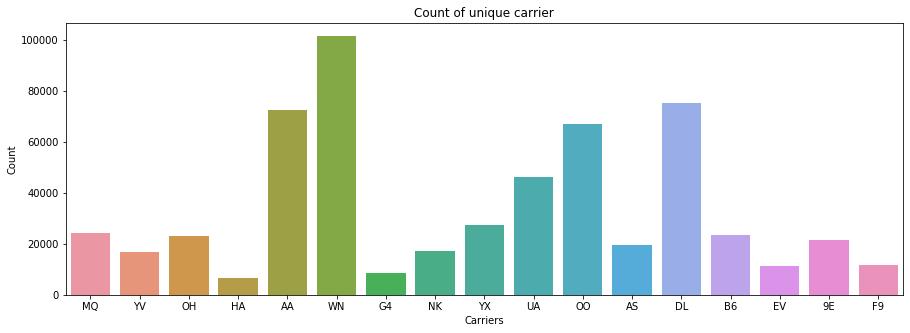

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['OP_UNIQUE_CARRIER'], data=data)
plt.xlabel("Carriers")
plt.ylabel("Count")
plt.title("Count of unique carrier")
plt.show()

### Count of origin and destination airport

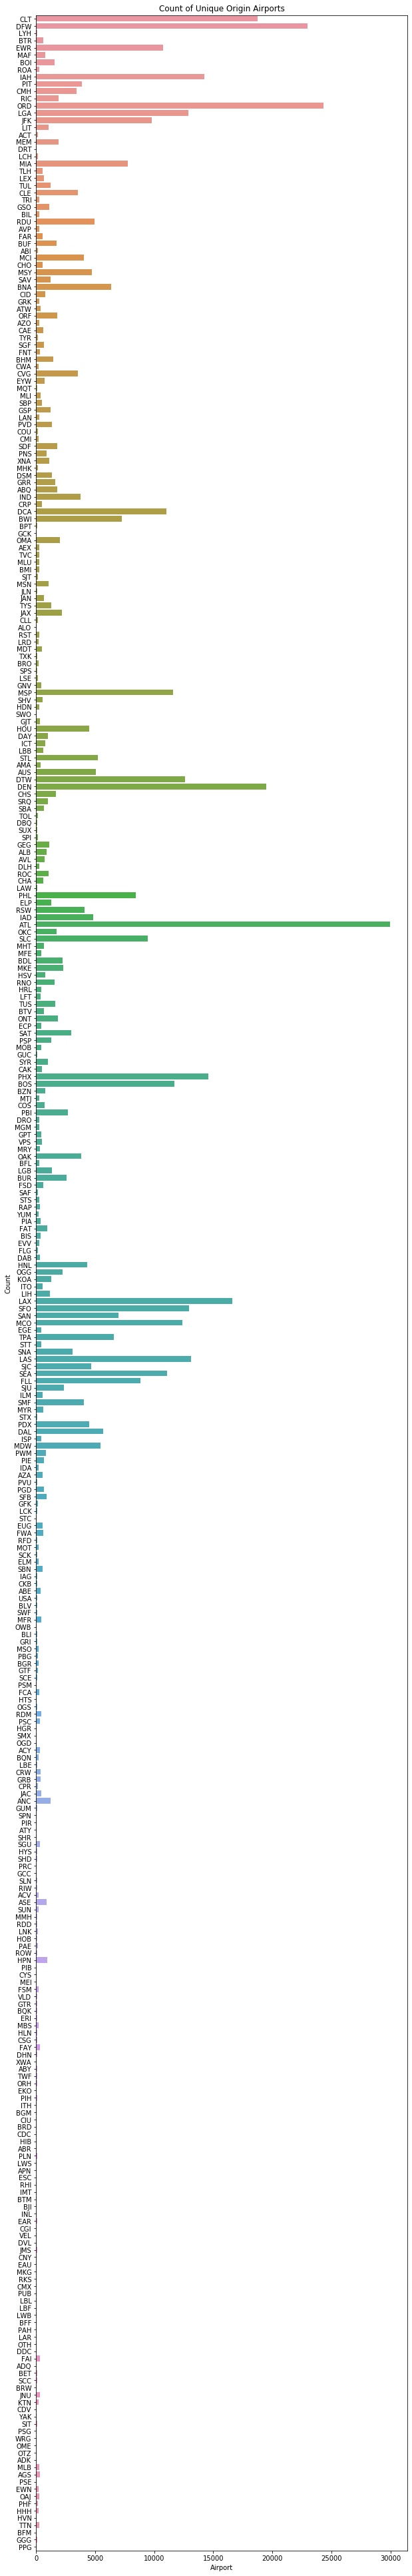

In [72]:
plt.figure(figsize=(10,70))
sns.countplot(y=data['ORIGIN'], data=data, orient="h")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.title("Count of Unique Origin Airports")
plt.show()

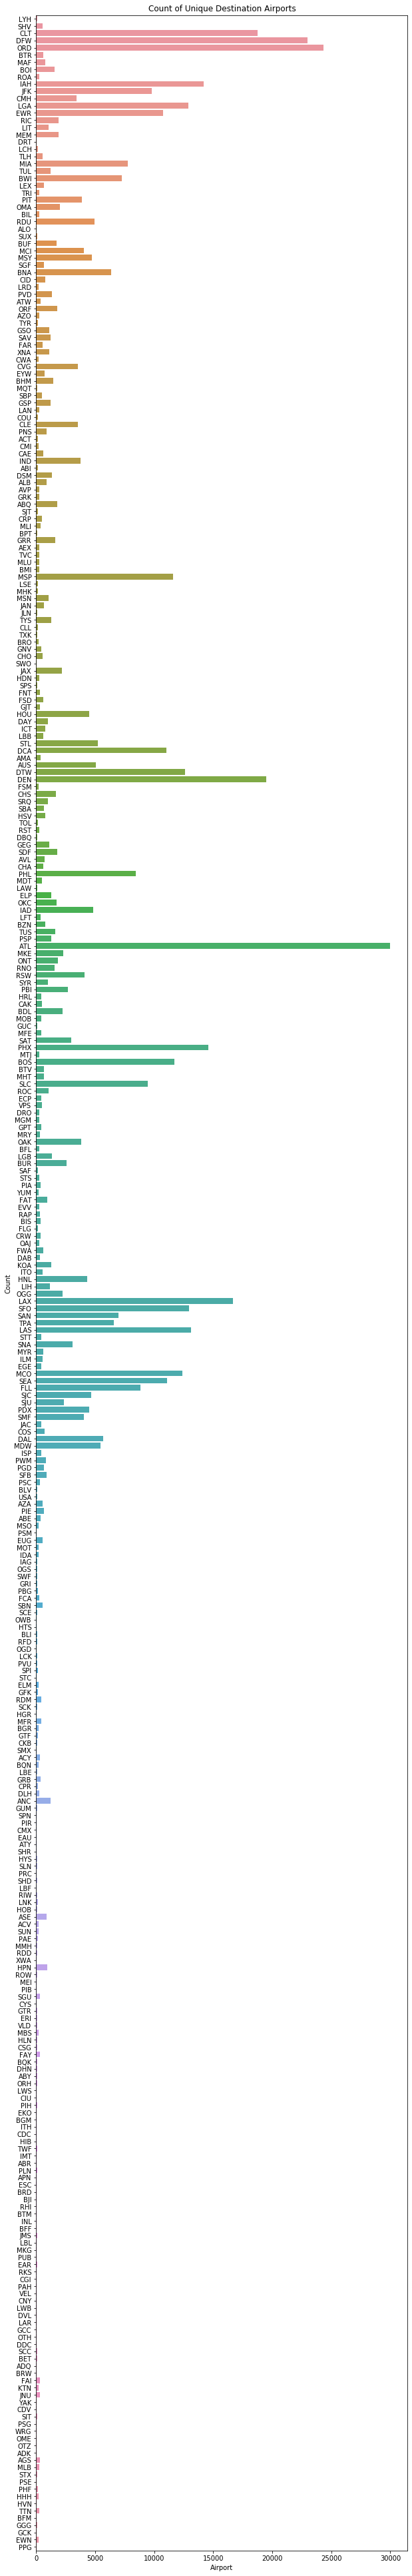

In [73]:
plt.figure(figsize=(10,70))
sns.countplot(y=data['DEST'], data=data, orient="h")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.title("Count of Unique Destination Airports")
plt.show()